In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
import ipywidgets as widgets
from scipy import stats

In [2]:
respiratory = pd.read_csv('respiratory_for_modeling_new.csv')

In [201]:
respiratory.describe()

,Year,Gender,Age Group,"Deaths_per_10,000",Emissions_CO_per_capita,Emissions_PM10_per_capita,Alaska,Arizona,Arkansas,California,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,...,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000,9649.000000
mean,2007.517256,0.506996,67.024044,51.582987,0.065227,0.019199,0.012229,0.023111,0.019380,0.032128,...,0.013680,0.021868,0.029537,0.017618,0.013162,0.021868,0.019069,0.018551,0.018758,0.013680
std,5.181264,0.499977,18.113265,66.830331,0.111127,0.039045,0.109913,0.150264,0.137865,0.176348,...,0.116166,0.146259,0.169314,0.131567,0.113974,0.146259,0.136776,0.134940,0.135678,0.116166
min,1999.000000,0.000000,0.500000,0.067272,0.000772,0.000090,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,60.000000,4.065970,0.013957,0.002315,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,1.000000,70.000000,20.763951,0.030557,0.006368,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,1.000000,80.000000,73.453978,0.068730,0.018620,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,1.000000,90.000000,356.138707,3.268416,0.659529,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Emissions_PM10_per_capita', ylabel='Deaths_per_10,000'>

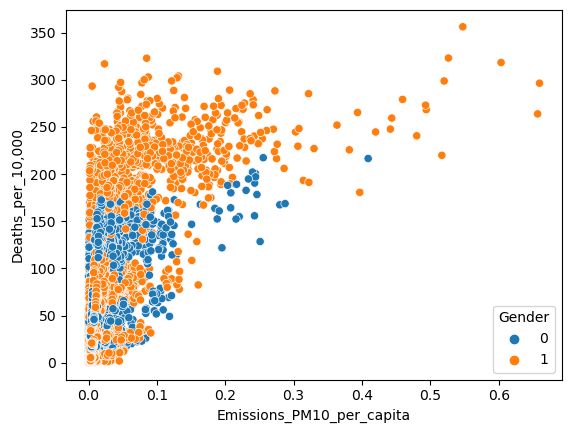

In [4]:
sns.scatterplot(data = respiratory, y = 'Deaths_per_10,000', x = 'Emissions_PM10_per_capita', hue = 'Gender')

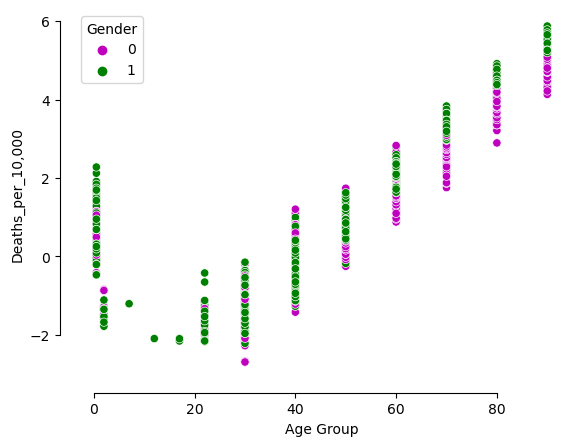

In [5]:
sns.scatterplot(y=np.log(respiratory['Deaths_per_10,000']), x="Age Group",
            hue="Gender", palette=["m", "g"],
            data=respiratory)
sns.despine(offset=10, trim=True)

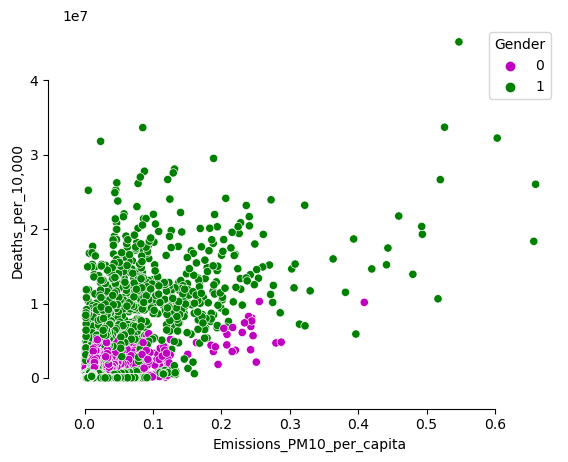

In [6]:
sns.scatterplot(y=(respiratory['Deaths_per_10,000']**3), x=respiratory['Emissions_PM10_per_capita'],
            hue="Gender", palette=["m", "g"],
            data=respiratory)
sns.despine(offset=10, trim=True)

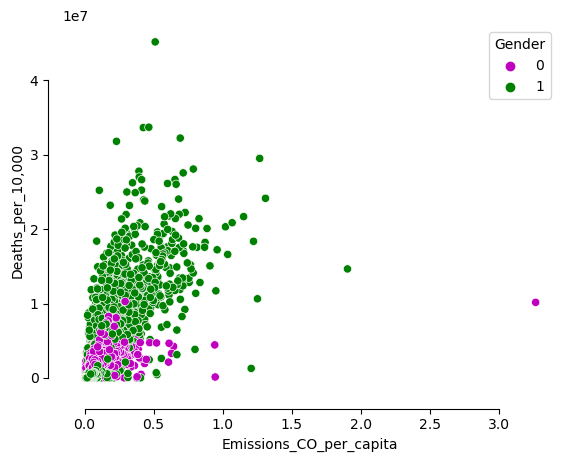

In [7]:
sns.scatterplot(y=(respiratory['Deaths_per_10,000']**3), x=respiratory['Emissions_CO_per_capita'],
            hue="Gender", palette=["m", "g"],
            data=respiratory)
sns.despine(offset=10, trim=True)

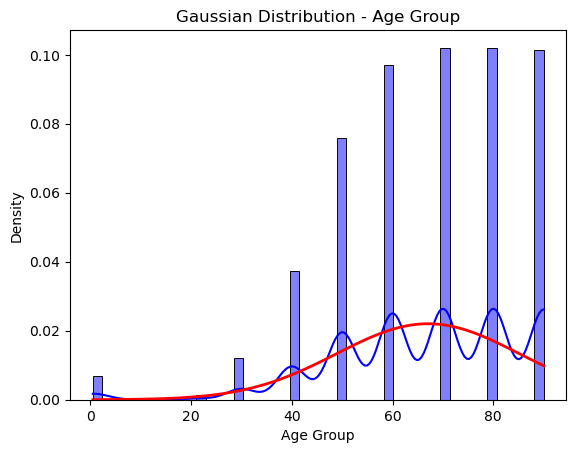

In [8]:
from scipy.stats import norm

# Assuming you have the 'Age' and 'BMI' variables in separate NumPy arrays
age_values = np.array(respiratory['Age Group'])


# Plot Gaussian distribution curve for 'BMI'
sns.histplot(age_values, kde=True, stat="density", color='blue')
plt.title('Gaussian Distribution - Age Group')
plt.xlabel('Age Group')
plt.ylabel('Density')
x_axis = np.linspace(age_values.min(), age_values.max(), 100)
plt.plot(x_axis, norm.pdf(x_axis, age_values.mean(), age_values.std()), color='red', linewidth=2)
plt.show()


In [1]:
# Specify the column name for the box plot
column_name = 'Age Group'  # Replace 'ColumnName' with the actual name of your column

# Create the box trace
box_trace = go.Box(y=respiratory[column_name], name=column_name)

# Create the figure
fig = go.Figure(data=[box_trace])

# Update the layout and axis labels
fig.update_layout(
    title='Box Plot of ' + column_name,
    yaxis_title=column_name
)

# Show the plot
fig.show()


NameError: name 'go' is not defined

In [2]:
# Specify the column name for the box plot
column_name = 'Emissions_PM10_per_capita'  # Replace 'ColumnName' with the actual name of your column

# Create the box trace
box_trace = go.Box(y=respiratory[column_name], name=column_name)

# Create the figure
fig = go.Figure(data=[box_trace])

# Update the layout and axis labels
fig.update_layout(
    title='Box Plot of ' + column_name,
    yaxis_title=column_name
)

# Show the plot
fig.show()

#respiratory

NameError: name 'go' is not defined

In [11]:
# Extract the predictor variables
predictors = respiratory[['Age Group', 'Gender', 'Emissions_CO_per_capita', 'Emissions_PM10_per_capita']]

# Calculate the VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Print the VIF values
print(vif)


                    Variable       VIF
0                  Age Group  2.345134
1                     Gender  1.882450
2    Emissions_CO_per_capita  2.543606
3  Emissions_PM10_per_capita  2.257915


In [202]:
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = respiratory.drop(['Deaths_per_10,000', 'Year', 'Age Group'], axis = 1)
y = respiratory['Deaths_per_10,000']

# Splitting the data into train and test sets
train_data = respiratory[respiratory['Year'] <= 2013]
test_data = respiratory[respiratory['Year'] > 2013]

X_train = train_data.drop(['Deaths_per_10,000', 'Year'], axis = 1)
y_train = train_data['Deaths_per_10,000']

X_test = test_data.drop(['Deaths_per_10,000', 'Year'], axis = 1)
y_test = test_data['Deaths_per_10,000']


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [186]:
# Create a decision tree regressor
tree = DecisionTreeRegressor(criterion = 'friedman_mse', 
                             min_samples_split = 150, 
                             min_samples_leaf = 2,
                             max_depth = 5,
                            min_impurity_decrease = 0.2)

# Fit the model to the training data
tree.fit(X_train, y_train)

# Predict on the test data
y_pred = tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 127.81051489059477


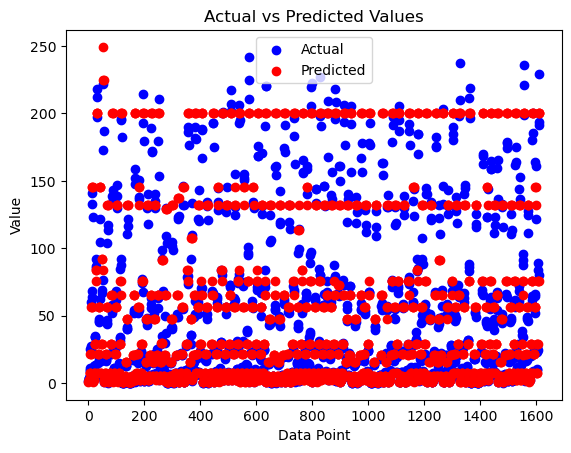

In [189]:

# Plot the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for Decision Tree')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [180]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the accuracy metrics
print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 0.9628733576860965
Mean Squared Error: 127.81051489059475


In [181]:
# Calculate the regular R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and number of predictors (p)
n = len(y_test)
p = train_data.shape[1]  # Assuming X is the matrix of independent variables

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9615363210497115


In [182]:
# Train your decision tree model (replace 'X' and 'y' with your data)
# model = DecisionTreeRegressor()
# model.fit(X, y)

# Get the feature importances
importances = tree.feature_importances_

# Get the feature names
feature_names = np.array(X_train.columns)

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

Age Group: 0.9163189330214276
Gender: 0.06523302604884221
Emissions_CO_per_capita: 0.011604998373112145
District of Columbia: 0.002064121538903441
Emissions_PM10_per_capita: 0.0019866506059484056
West Virginia: 0.001117012265450324
Florida: 0.0009609922077746367
Minnesota: 0.00041274159502076486
Hawaii: 0.00019826216271866392
Nevada: 0.00010326218080185736


# Random Forest

In [206]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 56.29457517269406
R2 Score: 0.9836474443558981


In [207]:
# Calculate the regular R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and number of predictors (p)
n = len(y_test)
p = train_data.shape[1]  # Assuming X is the matrix of independent variables

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9830585420304514


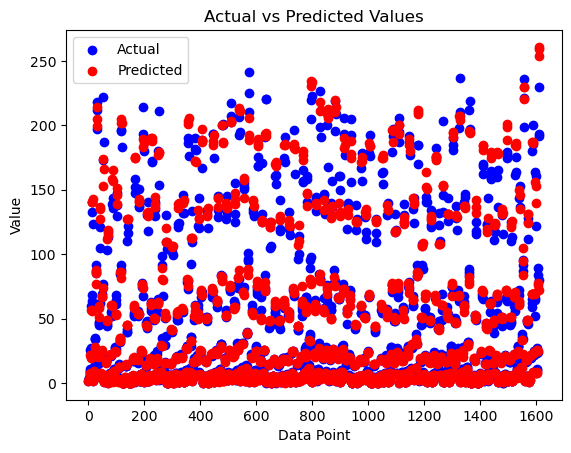

In [205]:
# import plotly.graph_objects as go

# # Creating the scatter plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual'))
# fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Predicted'))

# # Setting layout and labels
# fig.update_layout(
#     title='Actual vs Predicted Values',
#     xaxis_title='Actual Values',
#     yaxis_title='Predicted Values',
# )

# # Display the plot
# fig.show()



# Plot the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [195]:

# Get the feature importances
importances = rf_model.feature_importances_

# Get the feature names
feature_names = np.array(X_train.columns)

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature importances
for i in range(10):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

Age Group: 0.892412334132543
Gender: 0.06350025208426444
Emissions_CO_per_capita: 0.01749773670921877
Emissions_PM10_per_capita: 0.009154135721125988
Florida: 0.0016970237933226083
West Virginia: 0.0016091493245438814
District of Columbia: 0.0015911897090439262
Minnesota: 0.0011040570324969425
Oregon: 0.0010982171519508229
Alaska: 0.0008358426962850039


# SVR

In [208]:
from sklearn.svm import SVR

# Create an SVM regressor
svm_model = SVR(kernel = 'poly', degree = 2, gamma = 'auto', C = 2)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 692.3304030588939
R2 Score: 0.7988905430870801


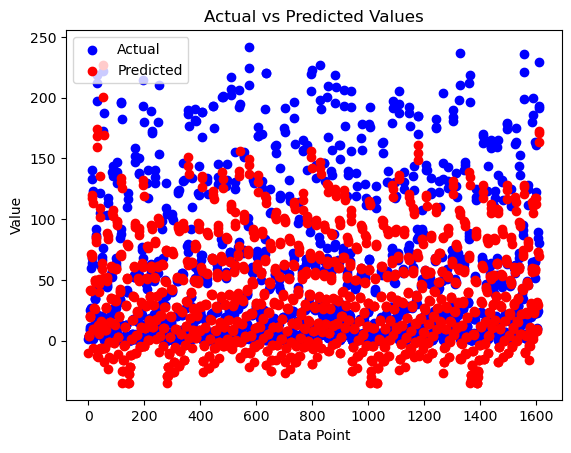

In [209]:
# import plotly.graph_objects as go

# # Creating the scatter plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual'))
# fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], mode='lines', name='Predicted'))

# # Setting layout and labels
# fig.update_layout(
#     title='Actual vs Predicted Values',
#     xaxis_title='Actual Values',
#     yaxis_title='Predicted Values',
# )

# # Display the plot
# fig.show()



# Plot the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot the predicted values
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')

# Set labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [210]:
# Calculate the regular R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate the number of observations (n) and number of predictors (p)
n = len(y_test)
p = train_data.shape[1]  # Assuming X is the matrix of independent variables

# Calculate the adjusted R-squared score
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.7916480160214058


In [200]:
# Get the support vectors
support_vectors = svm_model.support_vectors_

# Calculate the dual coefficients
dual_coefficients = np.abs(svm_model.dual_coef_)

# Calculate the weighted importance of features
weighted_importance = np.sum(support_vectors * dual_coefficients.T, axis=0)

# Get the feature names
feature_names = X_train.columns

# Create a dictionary of feature importance
feature_importance = dict(zip(feature_names, weighted_importance))

# Sort the feature importance in descending order
sorted_feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True)}

# Print the feature importance
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}: {importance}")


Age Group: 1067775.9427664273
Gender: 8080.178770943312
Emissions_CO_per_capita: 1147.5833056481783
California: 516.8400771954771
Texas: 470.57535162691704
New York: 461.031021891323
Illinois: 421.3785407697111
Florida: 398.71813859462935
Arizona: 377.2364025825924
Pennsylvania: 375.29266698639975
Michigan: 372.5869152795214
Georgia: 368.97514227706995
North Carolina: 364.1242526271703
Maryland: 363.654134070301
Ohio: 362.9759712200597
New Jersey: 362.3916554898352
South Carolina: 357.9663628193176
Virginia: 352.059624293699
Tennessee: 347.83979959009054
Massachusetts: 338.72294097310487
Indiana: 333.28753201571647
Louisiana: 325.74076835813383
Nevada: 323.47269101789635
Emissions_PM10_per_capita: 322.3482861567901
Mississippi: 321.9884697829383
Kentucky: 313.1252013838966
Missouri: 312.03506744043733
Arkansas: 308.5017248415894
Oklahoma: 304.36782344595133
Colorado: 303.4584371966341
Connecticut: 302.65242427271926
Washington: 302.59729604974626
West Virginia: 297.15039979078114
Wisco